### **✅ Step 1: Import Libraries**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models , optimizers , callbacks , regularizers , metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **✅ Step 2: Load Data**

In [2]:
df = pd.read_csv('1_C_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **➡️Identify the Feature columns and target column**

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### **➡️Find out the Data-types of column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **➡️Understand the statistics of the Dataset**

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **➡️Seperate Targer column From the Feature columns**

In [6]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [7]:
X.shape , y.shape

((768, 8), (768,))

#### **➡️ Standerize the feature columns**

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape , y.shape

((768, 8), (768,))

#### **➡️ Change data type to float32**

In [10]:
x = tf.convert_to_tensor(X_scaled, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [11]:
x.dtype, y.dtype

(tf.float32, tf.float32)

In [12]:
len(x)

768

#### **➡️ Split data in train and test**

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=600)

train_size = int(0.8 * len(x))
train_dataset = dataset.take(train_size).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = dataset.skip(train_size).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
train_dataset.element_spec, test_dataset.element_spec

((TensorSpec(shape=(None, 8), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 8), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.float32, name=None)))

#### **➡️ Show a Sample data to Train Model**

In [15]:
for X_batch, y_batch in train_dataset.take(1):
    print( X_batch.shape)
    print( y_batch.shape)
    print(' ')
    print( X_batch[0].numpy())
    print( y_batch[0].numpy())


(32, 8)
(32,)
 
[ 0.04601434 -0.8104249   0.04624525  0.71908575 -0.6928906   0.0136339
  0.4231902  -0.7862862 ]
0.0


### **✅ 1. Define the Neural Network Model**

#### **➡️ Create Model**

In [16]:
input_shape = (X_scaled.shape[1],)

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
	layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
	layers.Dense(1, activation='sigmoid')
])

f:\TensorFlow\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **➡️ Compile the Model**

In [17]:
model.compile(optimizer='adam',
			  loss='binary_crossentropy',
              metrics=['accuracy'])

#### **➡️ Visualize the Model**

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

#### **➡️ Train the Model**

In [19]:
test_dataset.element_spec

(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.float32, name=None))

In [20]:
history = model.fit(
    train_dataset,
    epochs=60,
	validation_data=test_dataset,
    verbose=1
)

Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6600 - loss: 0.6516 - val_accuracy: 0.7532 - val_loss: 0.5550
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.5696 - val_accuracy: 0.7597 - val_loss: 0.5027
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4805 - val_accuracy: 0.7662 - val_loss: 0.4470
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 0.4867 - val_accuracy: 0.7857 - val_loss: 0.4697
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.4529 - val_accuracy: 0.7792 - val_loss: 0.4737
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.4846 - val_accuracy: 0.7727 - val_loss: 0.4340
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7653 - loss: 0.4677 - val_accuracy: 0.7208 - val_loss: 0.4866
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.4407 - val_accuracy: 0.7727 - val_loss:

#### **➡️  Evaluate the Model**

In [21]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9146 - loss: 0.2345 
Test Accuracy: 0.9026


In [ ]:
print("accuracy:", accuracy)

accuracy: 0.9025974273681641


#### **➡️  Plot training loss & validation loss**

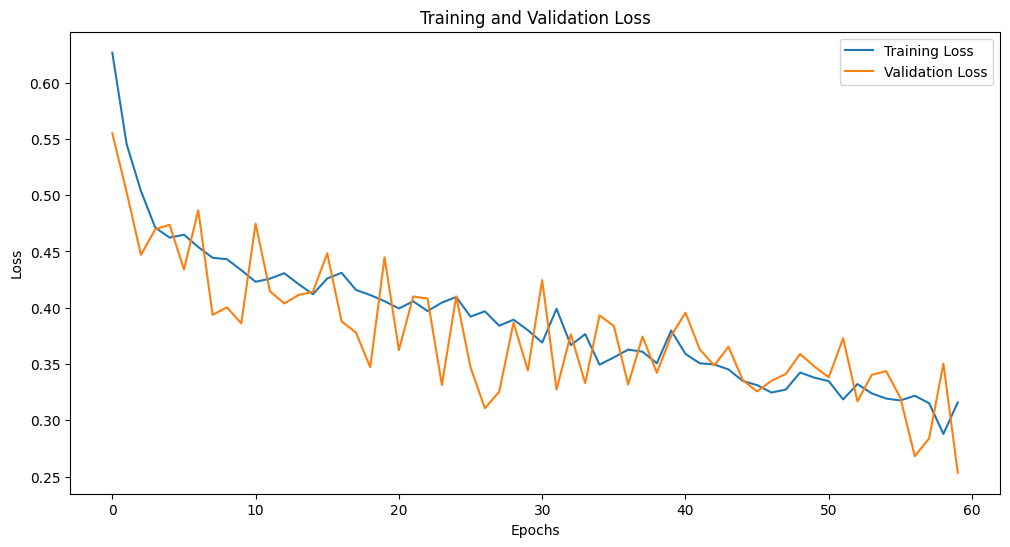

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()	
plt.show()

#### **➡️  plot training acuuracy & testing accuracy**

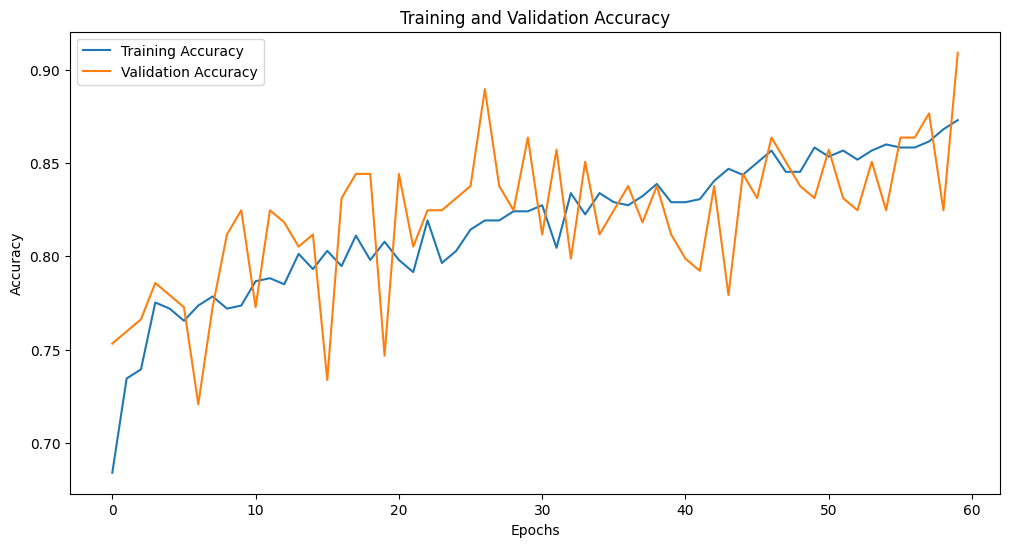

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### **➡️  Confusion matrix**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Text(0.5, 23.52222222222222, 'Predicted')

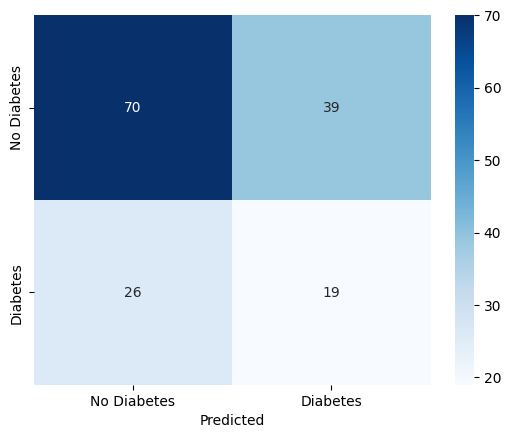

In [27]:
y_true = np.concatenate([y.numpy() for _, y in test_dataset], axis=0)
y_p = model.predict(test_dataset).flatten()
y_pred = (y_p > 0.5).astype(int)

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
			xticklabels=['No Diabetes', 'Diabetes'],
			yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')



#### **➡️  Classification Report**

In [29]:
print(classification_report(y_true, y_pred, target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.73      0.64      0.68       109
    Diabetes       0.33      0.42      0.37        45

    accuracy                           0.58       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.61      0.58      0.59       154



In [33]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.58


#### **➡️  Evaluate the Model**